In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from urllib.request import urlopen
import json
import glob

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from bible import kjv_verses, erv_verses, rv1989_verses
from gpt_classification import run_gpt_classification, gpt_explain_reasoning
from utils import save_dict_of_dfs_with_df_elements, load_dict_of_dfs_with_df_elements

In [3]:
kjv_verses[:5]

['In the beginning God created the heaven and the earth.\n',
 'And the earth was without form, and void; and darkness [was] upon the face of the deep. And the Spirit of God moved upon the face of the waters.\n',
 'And God said, Let there be light: and there was light.\n',
 'And God saw the light, that [it was] good: and God divided the light from the darkness.\n',
 'And God called the light Day, and the darkness he called Night. And the evening and the morning were the first day.\n']

In [4]:
erv_verses[:5]

['In the beginning God created the heaven and the earth.\n',
 'And the earth was waste and void; and darkness was upon the face of the deep: and the spirit of God moved upon the face of the waters.\n',
 'And God said, Let there be light: and there was light.\n',
 'And God saw the light, that it was good: and God divided the light from the darkness.\n',
 'And God called the light Day, and the darkness he called Night. And there was evening and there was morning, one day.\n']

In [5]:
rv1989_verses[:5]

['EN el principio crió Dios los cielos y la tierra.',
 'Y la tierra estaba desordenada y vacía, y las tinieblas estaban sobre la haz del abismo, y el Espíritu de Dios se movía sobre la haz de las aguas.',
 'Y dijo Dios: Sea la luz: y fué la luz.',
 'Y vió Dios que la luz era buena: y apartó Dios la luz de las tinieblas.',
 'Y llamó Dios á la luz Día, y á las tinieblas llamó Noche: y fué la tarde y la mañana un día.']

In [6]:
rv1989_df = pd.DataFrame(rv1989_verses, columns=['text'])
rv1989_df['label'] = False

kjv_df = pd.DataFrame(kjv_verses, columns=['text'])
kjv_df['label'] = True

rv1989_or_kjv_df = pd.concat([rv1989_df, kjv_df]).sample(frac=1, random_state=42)
rv1989_or_kjv_df

,text,label
29225,And what [is] the exceeding greatness of his p...,True
4543,"A los más darás mayor heredad, y á los menos m...",False
7835,Saul also and his men went to seek [him]. And ...,True
20488,"Y oí el sonido de sus alas cuando andaban, com...",False
26237,"Y también le dió poder de hacer juicio, en cua...",False
...,...,...
23241,Blessed [are] the merciful: for they shall obt...,True
7056,"And the chief of all the people, [even] of all...",True
860,"Porque poco tenías antes de mi venida, y ha cr...",False
15795,Grandes son las obras de Jehová; Buscadas de t...,False


In [7]:
erv_df = pd.DataFrame(erv_verses, columns=['text'])
erv_df['label'] = False

kjv_df = pd.DataFrame(kjv_verses, columns=['text'])
kjv_df['label'] = True

erv_or_kjv_df = pd.concat([erv_df, kjv_df]).sample(frac=1, random_state=42)
erv_or_kjv_df

,text,label
29225,And what [is] the exceeding greatness of his p...,True
4543,To the more thou shalt give the more inheritan...,False
7835,Saul also and his men went to seek [him]. And ...,True
20488,"And when they went, I heard the noise of their...",False
26237,"and he gave him authority to execute judgment,...",False
...,...,...
23241,Blessed [are] the merciful: for they shall obt...,True
7056,"And the chief of all the people, [even] of all...",True
860,For it was little which thou hadst before I ca...,False
15795,"The works of the LORD are great, sought out of...",False


In [8]:
# All translations have same number of verses, so dataset is balanced
print(rv1989_or_kjv_df['label'].value_counts())
print()
print(erv_or_kjv_df['label'].value_counts())

True     31102
False    31102
Name: label, dtype: int64

True     31102
False    31102
Name: label, dtype: int64


In [9]:
# Load the files, if we've run this before, else calculate & save

stem = 'rv1989_or_kjv_classification_results'
dataset = rv1989_or_kjv_df

if glob.glob(f'data/{stem}*feather'):
    rv1989_or_kjv_classification_results = load_dict_of_dfs_with_df_elements(
        filename_stem=stem,
        models_to_load=['gpt-4']
    )
else:
    rv1989_or_kjv_classification_results = run_gpt_classification(
        dataset,
        max_num_examples=100,
    )
    save_dict_of_dfs_with_df_elements(
        rv1989_or_kjv_classification_results,
        stem
    )

In [10]:
# Load the files, if we've run this before, else calculate & save

stem = 'erv_or_kjv_classification_results'
dataset = erv_or_kjv_df

if glob.glob(f'data/{stem}*feather'):
    erv_or_kjv_classification_results = load_dict_of_dfs_with_df_elements(
        filename_stem=stem,
        models_to_load=['gpt-4']
    )
else:
    erv_or_kjv_classification_results = run_gpt_classification(
        dataset,
        max_num_examples=100,
    )
    save_dict_of_dfs_with_df_elements(
        erv_or_kjv_classification_results,
        stem
    )

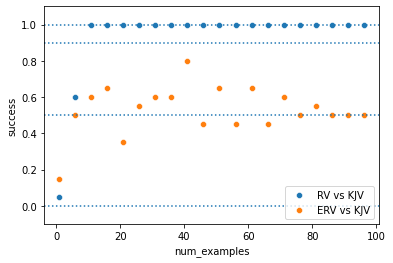

In [15]:
sns.scatterplot(data=rv1989_or_kjv_classification_results['gpt-4'],
                x='num_examples', y='success', label='RV vs KJV')
sns.scatterplot(data=erv_or_kjv_classification_results['gpt-4'],
                x='num_examples', y='success', label='ERV vs KJV')
plt.ylim(-0.1, 1.1)
plt.axhline(0, linestyle=':')
plt.axhline(0.5, linestyle=':')
plt.axhline(0.9, linestyle=':')
plt.axhline(1, linestyle=':')
plt.savefig('report/images/bible-classification.png')

In [12]:
for num_examples in [4, 8, 16, 24, 32]:
    print('===', num_examples, '===')
    print(gpt_explain_reasoning(
        rv1989_or_kjv_df.sample(n=num_examples, random_state=42)
    ))

=== 4 ===
The classification rule appears to be labeling the statements as true if they are quotes or phrases directly taken from a religious text, specifically the Bible.
=== 8 ===
The classification rule is based on the language of the text. Statements written in English are labelled as 'True', while those written in another language (Spanish in this case) are labelled as 'False'.
=== 16 ===
The classification rule is language-based. Statements or sentences written in English are labelled as "True", while those written in Spanish are labelled as "False."
=== 24 ===
The classification rule is based on whether the text is in English (labelled as 'True') or in Spanish (labelled as 'False').
=== 32 ===
The classification rule is whether the statement is in English (labelled as 'True') or in Spanish (labelled as 'False').


In [13]:
for num_examples in [4, 8, 16, 24, 32, 40]:
    print('===', num_examples, '===')
    print(gpt_explain_reasoning(
        erv_or_kjv_df.sample(n=num_examples, random_state=42)
    ))

=== 4 ===
The classification rule is that all the statements are labelled as "True". There doesn't seem to be a specific theme or content condition, just that their truth value is affirmed. It's also notable that these statements are written in an archaic style, indicative of a religious text, potentially the Bible.
=== 8 ===
The classification rule appears to be that if the statement is a verse or passage directly from the Bible, it is labelled as 'True'. If the statement deviates in any form from the Bible verse or passage, it is labelled 'False'.
=== 16 ===
The classification rule seems to be that if the statement is a direct quote from the Bible, it is classified as "True." If the statement is a misquote or not a quotation from the Bible, it is classified as "False."
=== 24 ===
The classification rule for these statements could be that statements that are labelled as "True" are direct quotes from the Bible's Old Testament, while statements that are labelled as "False" are either al

### So, obvious question: are ERV & KJV actually sufficiently different?

In [14]:
erv_eq_kjv = erv_df['text'] == kjv_df['text']
erv_eq_kjv.sum() / erv_eq_kjv.count()

0.11182560607034918

### Yeah, should be able to get ~80%